In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn import  metrics
from sklearn.model_selection import train_test_split

print(tf.__version__)



2.16.0-rc0


In [2]:
asthma=pd.read_csv("asthamapred_dataset.csv")
X=asthma.drop(columns=['PEFR'])
X.head()

,Age,Height,Gender,Outdoor Temperature,Humidity,PM 2.5,PM 10
0,19,155,1,33,60,16,23.62
1,26,183,1,32,71,12,18.29
2,22,153,0,27,85,27,38.29
3,25,160,0,26,88,18,26.20
4,18,162,0,26,85,16,23.62


In [3]:
y=asthma['PEFR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(7, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0,validation_data=(X_test, y_test))

mse = model.evaluate(X_test, y_test)
mse_percent =( mse / int(tf.reduce_mean(y_test))**2) * 100
x=np.sqrt(mse_percent)
print("RMSE Percentage:", x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 6678.8521
RMSE Percentage: 1.8573691809018122


In [41]:
import joblib
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

joblib.dump(model, 'PEFR_predictor.joblib')

loss, mae = model.evaluate(X_test, y_test)
y_test_float = tf.cast(y_test, dtype=tf.float32)
mae_percentage = (int(mae) / tf.math.reduce_variance(y_test_float))*100
mae_percentage





Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - loss: 3066.3235 - mae: 41.9071 - val_loss: 5111.3110 - val_mae: 58.5285
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 2886.0901 - mae: 42.9304 - val_loss: 4651.0132 - val_mae: 55.4539
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 2984.9177 - mae: 42.2460 - val_loss: 4481.2637 - val_mae: 54.2376
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 2784.7637 - mae: 43.9418 - val_loss: 4675.2202 - val_mae: 55.6406
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 2880.4436 - mae: 42.6021 - val_loss: 4910.6753 - val_mae: 57.2565
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 2773.5842 - mae: 43.5240 - val_loss: 5173.2627 - val_mae: 58.9641
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 2869.4204 - mae: 43.6546 - val_loss: 5417.0161 - val_mae: 60.4732
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 2934.8435 - mae: 42.0037 - val_loss: 5538.6230 - val_mae: 61.2056
Epoch 9/50
2/2 

PicklingError: Can't pickle <function Layer._initializer_tracker.<locals>.<lambda> at 0x000001B12EACA8E0>: it's not found as keras.src.layers.layer.Layer._initializer_tracker.<locals>.<lambda>

In [42]:
predictions=model.predict(X_test)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


array([[467.9805 ],
       [531.3571 ],
       [496.45547],
       [514.9509 ],
       [475.6978 ],
       [462.05984],
       [490.24817],
       [449.3226 ],
       [530.9557 ],
       [426.03867],
       [498.93262]], dtype=float32)

In [43]:
y_train
import matplotlib.pyplot as plt

In [44]:
mae_percentage.numpy()

1.1162505

In [45]:
print("RMSE Percentage:", x)

RMSE Percentage: 1.8573691809018122


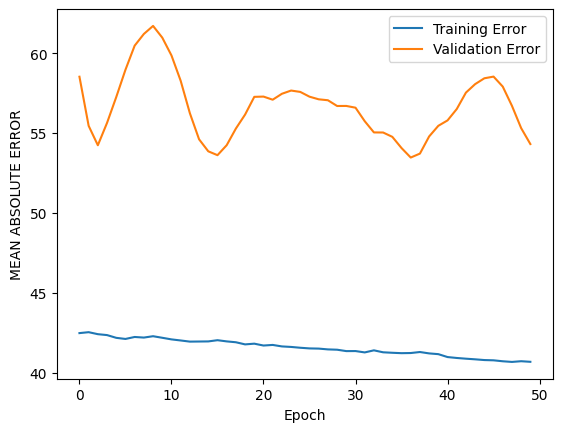

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label='Training Error')
plt.plot(history.history['val_mae'], label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('MEAN ABSOLUTE ERROR')
plt.legend()
plt.show()

In [ ]:
age=19
height=155
gender=1
hum=60
temp=33
pm25=16
pm10=23.62
actual_pefr=350

print(hum,temp,pm25,pm10)

params = np.array([age, height, gender, temp, hum, pm25, pm10])
params=params.reshape(1,7,1)
print(params)
print(params.shape)

y=model.predict(params)

In [37]:

predicted_pefr=y+300
print("predicted pefr:",predicted_pefr)
perpefr=(actual_pefr/predicted_pefr)*100
print(perpefr)
if perpefr>=80:
    print("safe")
elif perpefr>=50:
    print("moderate")
else:
    print("risk")

predicted pefr: [[797.0687]]
[[43.910892]]
risk
